In [14]:
from python_speech_features import mfcc
from python_speech_features import logfbank
from python_speech_features import fbank
from python_speech_features import ssc
import scipy.io.wavfile as wav
from pyts.image import GASF, GADF, MTF
import librosa
from librosa.display import specshow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram

from sklearn.preprocessing import LabelEncoder

import shutil
import os
from pathlib import Path 
import re
from collections import OrderedDict

# Feature Extraction

In [36]:
(rate,sig) = wav.read("../data/wav/train_0311.wav")
mfcc_feat = mfcc(sig,rate)
fbank_feat = logfbank(sig,rate)
ssc_feat = ssc(sig,rate)
logfbank_feat = logfbank(sig,rate)

In [37]:
print(sig.shape, fbank_feat.shape, mfcc_feat.shape, ssc_feat.shape, logfbank_feat.shape)

(1840000,) (11499, 26) (11499, 13) (11499, 26) (11499, 26)


# Data Loading

In [5]:
path_data = Path('../data/')
df_labs = pd.read_csv(path_data/'ComParE2018_AtypicalAffect.txt', sep='\t')

def fetch_data(directory='wav/', subset='train', length=50_000, pad_item=0):
    print(subset)
    sub = df_labs['file_name'].apply(lambda fn: subset in fn)
    df_lab_sub = df_labs[sub]
    y = df_lab_sub['emotion'].values
    fn = df_lab_sub['file_name']

    X = OrderedDict()
    for f in fn:
        wv = wav.read(f'{directory}/{f}')[1]
        n = wv.shape[0]
        if n < length:
            padding = np.repeat(pad_item, length-n)
            wv = np.hstack([padding, wv])
            
        #small changes here
        X[f] = wv[:length].reshape(1, -1)

    return np.vstack(X.values()), y


def normalize_data(tr_X, val_X = None, ts_X=None):
    m = tr_X.mean()
    sd = tr_X.std()
    return (tr_X-m)/sd #, (val_X-m)/sd, (ts_X-m)/sd, 


length = 50_000
(tr_X, tr_y) = fetch_data(directory=path_data/'wav', subset='train', length=length)
# (dv_X, dv_y) = fetch_data(directory=path_data/'wav', subset='devel', length=length)
# (ts_X, ts_y) = fetch_data(directory=path_data/'wav', subset='test', length=length)

train


# mel freq spectogram

In [29]:
def create_fold_spectrograms():
    spectrogram_path = Path(f'{path_data}/spectogram/')  
    audio_path = Path(f'{path_data}/wav/')  
    for audio_file in list(audio_path.glob('*.wav')):
        samples, sample_rate = librosa.load(audio_file)
        fig = plt.figure(figsize=[0.72,0.72])
        ax = fig.add_subplot(111)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_frame_on(False)
        filename = spectrogram_path/(str(audio_file.name).replace('wav', 'png'))
        print(filename)
        S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
        specshow(librosa.power_to_db(S, ref=np.max))
        plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
        plt.close('all')
        
        
create_fold_spectrograms()

../data/spectogram/train_3268.png
../data/spectogram/train_2185.png
../data/spectogram/train_2824.png
../data/spectogram/train_0418.png
../data/spectogram/devel_1846.png
../data/spectogram/train_0901.png
../data/spectogram/train_2037.png
../data/spectogram/devel_2156.png
../data/spectogram/train_2364.png
../data/spectogram/train_0504.png
../data/spectogram/train_2052.png
../data/spectogram/train_3238.png
../data/spectogram/train_0150.png
../data/spectogram/devel_1062.png
../data/spectogram/train_3038.png
../data/spectogram/devel_1424.png
../data/spectogram/devel_0107.png
../data/spectogram/devel_1796.png
../data/spectogram/devel_2572.png
../data/spectogram/train_1092.png
../data/spectogram/devel_2057.png
../data/spectogram/devel_0369.png
../data/spectogram/devel_1958.png
../data/spectogram/train_0650.png
../data/spectogram/train_1104.png
../data/spectogram/train_0095.png
../data/spectogram/devel_1487.png
../data/spectogram/train_2944.png
../data/spectogram/train_0054.png
../data/specto

../data/spectogram/train_2868.png
../data/spectogram/test_0663.png
../data/spectogram/test_0405.png
../data/spectogram/train_1854.png
../data/spectogram/train_1074.png
../data/spectogram/train_3023.png
../data/spectogram/train_2510.png
../data/spectogram/devel_0241.png
../data/spectogram/devel_1127.png
../data/spectogram/train_1866.png
../data/spectogram/devel_0275.png
../data/spectogram/train_0175.png
../data/spectogram/devel_0418.png
../data/spectogram/devel_2041.png
../data/spectogram/devel_2913.png
../data/spectogram/train_0496.png
../data/spectogram/test_0657.png
../data/spectogram/devel_1611.png
../data/spectogram/devel_0920.png
../data/spectogram/train_0122.png
../data/spectogram/train_2319.png
../data/spectogram/devel_1304.png
../data/spectogram/test_0999.png
../data/spectogram/train_1437.png
../data/spectogram/train_1499.png
../data/spectogram/devel_2687.png
../data/spectogram/devel_0281.png
../data/spectogram/devel_2590.png
../data/spectogram/devel_0386.png
../data/spectogram

../data/spectogram/train_1671.png
../data/spectogram/devel_2173.png
../data/spectogram/test_0015.png
../data/spectogram/devel_1436.png
../data/spectogram/devel_0332.png
../data/spectogram/devel_2125.png
../data/spectogram/train_0955.png
../data/spectogram/devel_2735.png
../data/spectogram/devel_1427.png
../data/spectogram/train_1276.png
../data/spectogram/test_0469.png
../data/spectogram/test_0850.png
../data/spectogram/devel_2051.png
../data/spectogram/devel_1216.png
../data/spectogram/test_0705.png
../data/spectogram/test_0621.png
../data/spectogram/devel_2741.png
../data/spectogram/test_0312.png
../data/spectogram/devel_0299.png
../data/spectogram/devel_2709.png
../data/spectogram/devel_2534.png
../data/spectogram/train_2033.png
../data/spectogram/train_1800.png
../data/spectogram/test_0361.png
../data/spectogram/devel_1756.png
../data/spectogram/devel_1963.png
../data/spectogram/train_0972.png
../data/spectogram/train_1364.png
../data/spectogram/train_0090.png
../data/spectogram/tr

../data/spectogram/train_0120.png
../data/spectogram/devel_1326.png
../data/spectogram/train_1270.png
../data/spectogram/devel_1240.png
../data/spectogram/devel_0829.png
../data/spectogram/test_0131.png
../data/spectogram/train_2698.png
../data/spectogram/devel_1349.png
../data/spectogram/train_0602.png
../data/spectogram/train_3119.png
../data/spectogram/devel_2308.png
../data/spectogram/test_0059.png
../data/spectogram/devel_0636.png
../data/spectogram/train_3157.png
../data/spectogram/devel_0476.png
../data/spectogram/train_0193.png
../data/spectogram/test_0037.png
../data/spectogram/train_0280.png
../data/spectogram/devel_0351.png
../data/spectogram/test_0648.png
../data/spectogram/devel_2000.png
../data/spectogram/train_3299.png
../data/spectogram/train_1839.png
../data/spectogram/test_0333.png
../data/spectogram/train_3216.png
../data/spectogram/devel_1209.png
../data/spectogram/devel_0729.png
../data/spectogram/train_1704.png
../data/spectogram/devel_0062.png
../data/spectogram/

../data/spectogram/devel_0741.png
../data/spectogram/devel_2902.png
../data/spectogram/test_0994.png
../data/spectogram/train_2897.png
../data/spectogram/devel_1493.png
../data/spectogram/devel_1697.png
../data/spectogram/devel_1757.png
../data/spectogram/devel_2415.png
../data/spectogram/train_2934.png
../data/spectogram/devel_2214.png
../data/spectogram/devel_2813.png
../data/spectogram/train_2107.png
../data/spectogram/train_0057.png
../data/spectogram/devel_1770.png
../data/spectogram/devel_2327.png
../data/spectogram/devel_0350.png
../data/spectogram/train_1780.png
../data/spectogram/train_2359.png
../data/spectogram/devel_1986.png
../data/spectogram/devel_2234.png
../data/spectogram/train_0391.png
../data/spectogram/devel_2692.png
../data/spectogram/train_2383.png
../data/spectogram/train_1099.png
../data/spectogram/devel_2094.png
../data/spectogram/devel_0644.png
../data/spectogram/train_1793.png
../data/spectogram/devel_1621.png
../data/spectogram/train_0694.png
../data/spectog

../data/spectogram/devel_0549.png
../data/spectogram/devel_1329.png
../data/spectogram/devel_0481.png
../data/spectogram/train_0751.png
../data/spectogram/train_1514.png
../data/spectogram/train_0083.png
../data/spectogram/train_1392.png
../data/spectogram/train_3137.png
../data/spectogram/train_0710.png
../data/spectogram/train_2456.png
../data/spectogram/devel_2471.png
../data/spectogram/train_2706.png
../data/spectogram/train_3164.png
../data/spectogram/devel_1685.png
../data/spectogram/devel_2290.png
../data/spectogram/train_0856.png
../data/spectogram/train_3078.png
../data/spectogram/train_1997.png
../data/spectogram/devel_1083.png
../data/spectogram/train_2314.png
../data/spectogram/devel_1010.png
../data/spectogram/devel_2736.png
../data/spectogram/train_2650.png
../data/spectogram/devel_0499.png
../data/spectogram/train_3259.png
../data/spectogram/train_1239.png
../data/spectogram/devel_2854.png
../data/spectogram/devel_1122.png
../data/spectogram/devel_0383.png
../data/specto

../data/spectogram/devel_0423.png
../data/spectogram/train_0422.png
../data/spectogram/devel_0075.png
../data/spectogram/train_2263.png
../data/spectogram/devel_2458.png
../data/spectogram/test_0535.png
../data/spectogram/train_0983.png
../data/spectogram/devel_0316.png
../data/spectogram/train_1188.png
../data/spectogram/devel_0527.png
../data/spectogram/train_2648.png
../data/spectogram/test_0338.png
../data/spectogram/devel_1938.png
../data/spectogram/devel_2026.png
../data/spectogram/devel_2502.png
../data/spectogram/devel_2881.png
../data/spectogram/devel_1945.png
../data/spectogram/devel_2082.png
../data/spectogram/train_0388.png
../data/spectogram/devel_1875.png
../data/spectogram/devel_0360.png
../data/spectogram/devel_0873.png
../data/spectogram/train_3018.png
../data/spectogram/train_1135.png
../data/spectogram/train_0572.png
../data/spectogram/test_0247.png
../data/spectogram/train_2247.png
../data/spectogram/train_1383.png
../data/spectogram/train_0864.png
../data/spectogra

../data/spectogram/devel_0547.png
../data/spectogram/devel_1779.png
../data/spectogram/devel_2872.png
../data/spectogram/train_2789.png
../data/spectogram/train_3048.png
../data/spectogram/train_1156.png
../data/spectogram/devel_0643.png
../data/spectogram/train_0784.png
../data/spectogram/train_2022.png
../data/spectogram/train_1783.png
../data/spectogram/train_0348.png
../data/spectogram/train_2526.png
../data/spectogram/devel_2455.png
../data/spectogram/train_2953.png
../data/spectogram/devel_1264.png
../data/spectogram/devel_1927.png
../data/spectogram/devel_1861.png
../data/spectogram/devel_2738.png
../data/spectogram/devel_0064.png
../data/spectogram/devel_2933.png
../data/spectogram/devel_0414.png
../data/spectogram/train_1654.png
../data/spectogram/train_2598.png
../data/spectogram/train_2406.png
../data/spectogram/test_0561.png
../data/spectogram/train_0757.png
../data/spectogram/test_0683.png
../data/spectogram/devel_1908.png
../data/spectogram/train_2226.png
../data/spectogr

../data/spectogram/test_0522.png
../data/spectogram/train_1855.png
../data/spectogram/devel_0629.png
../data/spectogram/train_0680.png
../data/spectogram/train_2810.png
../data/spectogram/train_1633.png
../data/spectogram/devel_0266.png
../data/spectogram/train_1018.png
../data/spectogram/devel_1630.png
../data/spectogram/devel_0450.png
../data/spectogram/devel_2609.png
../data/spectogram/devel_0581.png
../data/spectogram/devel_0354.png
../data/spectogram/devel_0979.png
../data/spectogram/devel_2794.png
../data/spectogram/devel_0971.png
../data/spectogram/devel_0836.png
../data/spectogram/devel_0054.png
../data/spectogram/devel_1256.png
../data/spectogram/train_1923.png
../data/spectogram/devel_0392.png
../data/spectogram/train_3125.png
../data/spectogram/train_3286.png
../data/spectogram/test_0188.png
../data/spectogram/devel_2662.png
../data/spectogram/train_2980.png
../data/spectogram/devel_0014.png
../data/spectogram/train_2231.png
../data/spectogram/train_3246.png
../data/spectogr

../data/spectogram/devel_2803.png
../data/spectogram/train_0254.png
../data/spectogram/devel_0627.png
../data/spectogram/devel_0953.png
../data/spectogram/train_1484.png
../data/spectogram/train_1110.png
../data/spectogram/devel_1695.png
../data/spectogram/devel_0830.png
../data/spectogram/train_3249.png
../data/spectogram/train_0435.png
../data/spectogram/train_0527.png
../data/spectogram/test_0714.png
../data/spectogram/train_0472.png
../data/spectogram/devel_2466.png
../data/spectogram/train_0094.png
../data/spectogram/train_0196.png
../data/spectogram/devel_1354.png
../data/spectogram/train_1288.png
../data/spectogram/train_1756.png
../data/spectogram/devel_0984.png
../data/spectogram/devel_0616.png
../data/spectogram/train_0371.png
../data/spectogram/devel_1303.png
../data/spectogram/train_2797.png
../data/spectogram/train_1015.png
../data/spectogram/devel_0161.png
../data/spectogram/train_1652.png
../data/spectogram/devel_0621.png
../data/spectogram/train_0024.png
../data/spectog

../data/spectogram/test_0751.png
../data/spectogram/train_2488.png
../data/spectogram/train_0520.png
../data/spectogram/devel_2378.png
../data/spectogram/devel_1819.png
../data/spectogram/devel_1405.png
../data/spectogram/devel_1855.png
../data/spectogram/devel_1701.png
../data/spectogram/devel_1951.png
../data/spectogram/test_0418.png
../data/spectogram/test_0618.png
../data/spectogram/test_0182.png
../data/spectogram/devel_2312.png
../data/spectogram/devel_0617.png
../data/spectogram/devel_2374.png
../data/spectogram/devel_2139.png
../data/spectogram/train_1030.png
../data/spectogram/devel_0786.png
../data/spectogram/devel_0268.png
../data/spectogram/devel_1682.png
../data/spectogram/devel_0958.png
../data/spectogram/devel_2690.png
../data/spectogram/train_3335.png
../data/spectogram/train_1757.png
../data/spectogram/devel_0604.png
../data/spectogram/train_0441.png
../data/spectogram/train_2268.png
../data/spectogram/devel_0915.png
../data/spectogram/train_3066.png
../data/spectogram

../data/spectogram/devel_2114.png
../data/spectogram/devel_0658.png
../data/spectogram/train_3341.png
../data/spectogram/train_1320.png
../data/spectogram/train_2937.png
../data/spectogram/devel_2725.png
../data/spectogram/train_2284.png
../data/spectogram/devel_0524.png
../data/spectogram/test_0749.png
../data/spectogram/test_0746.png
../data/spectogram/devel_0337.png
../data/spectogram/train_1732.png
../data/spectogram/test_0139.png
../data/spectogram/train_0832.png
../data/spectogram/test_0499.png
../data/spectogram/devel_1265.png
../data/spectogram/test_0089.png
../data/spectogram/test_0155.png
../data/spectogram/train_1734.png
../data/spectogram/train_2894.png
../data/spectogram/devel_1361.png
../data/spectogram/train_1675.png
../data/spectogram/devel_0403.png
../data/spectogram/train_0750.png
../data/spectogram/devel_0010.png
../data/spectogram/devel_0562.png
../data/spectogram/test_0027.png
../data/spectogram/train_3293.png
../data/spectogram/devel_0285.png
../data/spectogram/de

../data/spectogram/devel_2934.png
../data/spectogram/devel_2635.png
../data/spectogram/test_0257.png
../data/spectogram/devel_1635.png
../data/spectogram/train_1905.png
../data/spectogram/train_2988.png
../data/spectogram/test_0516.png
../data/spectogram/devel_2317.png
../data/spectogram/test_0296.png
../data/spectogram/devel_2239.png
../data/spectogram/test_0242.png
../data/spectogram/test_0421.png
../data/spectogram/train_0769.png
../data/spectogram/train_3272.png
../data/spectogram/train_3076.png
../data/spectogram/devel_0156.png
../data/spectogram/devel_2044.png
../data/spectogram/train_0482.png
../data/spectogram/devel_0050.png
../data/spectogram/train_2235.png
../data/spectogram/devel_1694.png
../data/spectogram/devel_0652.png
../data/spectogram/train_0099.png
../data/spectogram/train_2455.png
../data/spectogram/devel_2038.png
../data/spectogram/train_0639.png
../data/spectogram/devel_1080.png
../data/spectogram/devel_2187.png
../data/spectogram/test_0967.png
../data/spectogram/d

../data/spectogram/devel_1130.png
../data/spectogram/train_1481.png
../data/spectogram/train_2711.png
../data/spectogram/train_1892.png
../data/spectogram/train_0157.png
../data/spectogram/devel_0618.png
../data/spectogram/test_0608.png
../data/spectogram/train_0826.png
../data/spectogram/test_0395.png
../data/spectogram/devel_1042.png
../data/spectogram/devel_0727.png
../data/spectogram/devel_2052.png
../data/spectogram/train_1645.png
../data/spectogram/devel_2353.png
../data/spectogram/devel_1000.png
../data/spectogram/train_1962.png
../data/spectogram/test_0696.png
../data/spectogram/train_3260.png
../data/spectogram/test_0788.png
../data/spectogram/test_0081.png
../data/spectogram/test_0156.png
../data/spectogram/devel_1212.png
../data/spectogram/train_1023.png
../data/spectogram/train_2871.png
../data/spectogram/train_1811.png
../data/spectogram/train_1512.png
../data/spectogram/devel_2367.png
../data/spectogram/devel_2699.png
../data/spectogram/devel_2958.png
../data/spectogram/t

../data/spectogram/train_3122.png
../data/spectogram/devel_0487.png
../data/spectogram/train_2318.png
../data/spectogram/devel_0614.png
../data/spectogram/train_2296.png
../data/spectogram/devel_2424.png
../data/spectogram/devel_2743.png
../data/spectogram/test_0164.png
../data/spectogram/test_0493.png
../data/spectogram/train_1623.png
../data/spectogram/train_0378.png
../data/spectogram/test_0372.png
../data/spectogram/devel_2939.png
../data/spectogram/test_0127.png
../data/spectogram/train_2411.png
../data/spectogram/devel_0931.png
../data/spectogram/train_0820.png
../data/spectogram/train_1829.png
../data/spectogram/devel_0964.png
../data/spectogram/train_0267.png
../data/spectogram/train_0356.png
../data/spectogram/devel_2453.png
../data/spectogram/train_3332.png
../data/spectogram/train_0003.png
../data/spectogram/devel_1650.png
../data/spectogram/devel_1129.png
../data/spectogram/train_1360.png
../data/spectogram/train_3289.png
../data/spectogram/test_0181.png
../data/spectogram/

../data/spectogram/devel_2155.png
../data/spectogram/devel_2183.png
../data/spectogram/test_0756.png
../data/spectogram/devel_0007.png
../data/spectogram/devel_1483.png
../data/spectogram/devel_1605.png
../data/spectogram/train_1375.png
../data/spectogram/devel_1244.png
../data/spectogram/test_0453.png
../data/spectogram/train_2523.png
../data/spectogram/train_3160.png
../data/spectogram/test_0387.png
../data/spectogram/devel_2422.png
../data/spectogram/devel_0856.png
../data/spectogram/devel_2210.png
../data/spectogram/train_0239.png
../data/spectogram/train_0225.png
../data/spectogram/devel_1840.png
../data/spectogram/devel_2807.png
../data/spectogram/test_0374.png
../data/spectogram/train_3301.png
../data/spectogram/devel_0978.png
../data/spectogram/train_2412.png
../data/spectogram/devel_2776.png
../data/spectogram/train_0891.png
../data/spectogram/train_1142.png
../data/spectogram/devel_1475.png
../data/spectogram/train_2618.png
../data/spectogram/test_0046.png
../data/spectogram/

../data/spectogram/train_1953.png
../data/spectogram/train_2553.png
../data/spectogram/devel_1899.png
../data/spectogram/devel_1292.png
../data/spectogram/train_3330.png
../data/spectogram/test_0381.png
../data/spectogram/devel_2492.png
../data/spectogram/train_1719.png
../data/spectogram/train_3169.png
../data/spectogram/train_3007.png
../data/spectogram/devel_2501.png
../data/spectogram/train_3191.png
../data/spectogram/devel_0196.png
../data/spectogram/devel_0762.png
../data/spectogram/train_2669.png
../data/spectogram/train_3187.png
../data/spectogram/test_0013.png
../data/spectogram/test_0444.png
../data/spectogram/train_2900.png
../data/spectogram/devel_1618.png
../data/spectogram/train_1964.png
../data/spectogram/devel_1368.png
../data/spectogram/test_0283.png
../data/spectogram/devel_0460.png
../data/spectogram/train_3058.png
../data/spectogram/train_2116.png
../data/spectogram/train_1638.png
../data/spectogram/devel_2824.png
../data/spectogram/train_2796.png
../data/spectogram

../data/spectogram/devel_2658.png
../data/spectogram/test_0391.png
../data/spectogram/train_1474.png
../data/spectogram/test_0889.png
../data/spectogram/devel_0343.png
../data/spectogram/devel_1048.png
../data/spectogram/train_2865.png
../data/spectogram/devel_1038.png
../data/spectogram/devel_0149.png
../data/spectogram/test_0665.png
../data/spectogram/train_2407.png
../data/spectogram/train_1957.png
../data/spectogram/train_3281.png
../data/spectogram/train_3142.png
../data/spectogram/train_0168.png
../data/spectogram/train_0486.png
../data/spectogram/test_0534.png
../data/spectogram/devel_2749.png
../data/spectogram/train_0264.png
../data/spectogram/test_0536.png
../data/spectogram/devel_1269.png
../data/spectogram/test_0477.png
../data/spectogram/devel_1964.png
../data/spectogram/train_2844.png
../data/spectogram/test_0259.png
../data/spectogram/devel_0364.png
../data/spectogram/train_3273.png
../data/spectogram/train_0230.png
../data/spectogram/devel_0109.png
../data/spectogram/te

../data/spectogram/train_0256.png
../data/spectogram/devel_1883.png
../data/spectogram/devel_1024.png
../data/spectogram/train_1709.png
../data/spectogram/test_0997.png
../data/spectogram/devel_0197.png
../data/spectogram/train_1491.png
../data/spectogram/train_2180.png
../data/spectogram/test_0014.png
../data/spectogram/train_2447.png
../data/spectogram/train_0714.png
../data/spectogram/train_0434.png
../data/spectogram/devel_2612.png
../data/spectogram/devel_1568.png
../data/spectogram/train_0755.png
../data/spectogram/train_2078.png
../data/spectogram/test_0519.png
../data/spectogram/train_0943.png
../data/spectogram/train_1333.png
../data/spectogram/train_1091.png
../data/spectogram/devel_1902.png
../data/spectogram/devel_0532.png
../data/spectogram/train_1551.png
../data/spectogram/devel_2873.png
../data/spectogram/devel_2386.png
../data/spectogram/devel_1669.png
../data/spectogram/train_1174.png
../data/spectogram/devel_1090.png
../data/spectogram/test_0980.png
../data/spectogram

../data/spectogram/train_0560.png
../data/spectogram/train_3115.png
../data/spectogram/train_1322.png
../data/spectogram/train_3147.png
../data/spectogram/devel_0182.png
../data/spectogram/devel_1928.png
../data/spectogram/devel_0651.png
../data/spectogram/train_0902.png
../data/spectogram/train_0673.png
../data/spectogram/devel_0712.png
../data/spectogram/test_0515.png
../data/spectogram/train_2351.png
../data/spectogram/devel_1774.png
../data/spectogram/devel_0748.png
../data/spectogram/train_1237.png
../data/spectogram/devel_2320.png
../data/spectogram/train_0512.png
../data/spectogram/devel_1961.png
../data/spectogram/devel_0439.png
../data/spectogram/test_0022.png
../data/spectogram/devel_0597.png
../data/spectogram/train_0892.png
../data/spectogram/train_1700.png
../data/spectogram/train_2123.png
../data/spectogram/test_0793.png
../data/spectogram/devel_1089.png
../data/spectogram/train_1456.png
../data/spectogram/test_0906.png
../data/spectogram/test_0386.png
../data/spectogram/

../data/spectogram/train_1078.png
../data/spectogram/train_1020.png
../data/spectogram/train_3307.png
../data/spectogram/devel_2520.png
../data/spectogram/devel_1626.png
../data/spectogram/devel_1798.png
../data/spectogram/test_0429.png
../data/spectogram/train_0229.png
../data/spectogram/devel_2729.png
../data/spectogram/devel_2763.png
../data/spectogram/devel_0824.png
../data/spectogram/test_0891.png
../data/spectogram/train_2209.png
../data/spectogram/train_1770.png
../data/spectogram/train_1995.png
../data/spectogram/test_0160.png
../data/spectogram/train_1987.png
../data/spectogram/train_1263.png
../data/spectogram/train_2066.png
../data/spectogram/test_0513.png
../data/spectogram/train_0370.png
../data/spectogram/train_0226.png
../data/spectogram/devel_1435.png
../data/spectogram/test_0698.png
../data/spectogram/test_0695.png
../data/spectogram/train_1388.png
../data/spectogram/test_0205.png
../data/spectogram/train_0469.png
../data/spectogram/test_0727.png
../data/spectogram/tes

../data/spectogram/devel_1159.png
../data/spectogram/devel_2417.png
../data/spectogram/devel_0480.png
../data/spectogram/train_0351.png
../data/spectogram/test_0549.png
../data/spectogram/train_3144.png
../data/spectogram/train_3224.png
../data/spectogram/devel_2421.png
../data/spectogram/devel_1012.png
../data/spectogram/devel_0106.png
../data/spectogram/train_2477.png
../data/spectogram/devel_2907.png
../data/spectogram/devel_2786.png
../data/spectogram/train_0876.png
../data/spectogram/devel_0435.png
../data/spectogram/train_2496.png
../data/spectogram/devel_2972.png
../data/spectogram/devel_1745.png
../data/spectogram/train_1836.png
../data/spectogram/train_0682.png
../data/spectogram/devel_1425.png
../data/spectogram/test_0771.png
../data/spectogram/train_1009.png
../data/spectogram/devel_1687.png
../data/spectogram/train_3179.png
../data/spectogram/train_0910.png
../data/spectogram/train_0617.png
../data/spectogram/devel_0927.png
../data/spectogram/train_2092.png
../data/spectogr

../data/spectogram/train_3112.png
../data/spectogram/train_1455.png
../data/spectogram/train_1443.png
../data/spectogram/train_1310.png
../data/spectogram/devel_1494.png
../data/spectogram/train_0181.png
../data/spectogram/devel_1120.png
../data/spectogram/devel_0600.png
../data/spectogram/train_3166.png
../data/spectogram/train_1688.png
../data/spectogram/test_0959.png
../data/spectogram/devel_1268.png
../data/spectogram/devel_2937.png
../data/spectogram/devel_2615.png
../data/spectogram/train_2857.png
../data/spectogram/devel_1514.png
../data/spectogram/train_1294.png
../data/spectogram/train_2536.png
../data/spectogram/train_2388.png
../data/spectogram/train_0759.png
../data/spectogram/train_2350.png
../data/spectogram/train_0999.png
../data/spectogram/devel_0501.png
../data/spectogram/devel_2967.png
../data/spectogram/train_2346.png
../data/spectogram/devel_1311.png
../data/spectogram/devel_2273.png
../data/spectogram/test_0953.png
../data/spectogram/train_1741.png
../data/spectogr

../data/spectogram/devel_2447.png
../data/spectogram/devel_2923.png
../data/spectogram/devel_1670.png
../data/spectogram/test_0106.png
../data/spectogram/devel_0813.png
../data/spectogram/train_1072.png
../data/spectogram/devel_0733.png
../data/spectogram/devel_1003.png
../data/spectogram/train_2420.png
../data/spectogram/devel_1166.png
../data/spectogram/test_0337.png
../data/spectogram/train_2353.png
../data/spectogram/train_2485.png
../data/spectogram/train_2380.png
../data/spectogram/train_2516.png
../data/spectogram/train_1742.png
../data/spectogram/devel_2979.png
../data/spectogram/train_2537.png
../data/spectogram/test_0669.png
../data/spectogram/test_0088.png
../data/spectogram/test_0510.png
../data/spectogram/devel_2203.png
../data/spectogram/train_1706.png
../data/spectogram/devel_2107.png
../data/spectogram/devel_1473.png
../data/spectogram/test_0996.png
../data/spectogram/devel_0962.png
../data/spectogram/train_1828.png
../data/spectogram/test_0952.png
../data/spectogram/tr

../data/spectogram/train_2951.png
../data/spectogram/devel_2116.png
../data/spectogram/devel_2238.png
../data/spectogram/devel_1744.png
../data/spectogram/train_1989.png
../data/spectogram/devel_2113.png
../data/spectogram/devel_2878.png
../data/spectogram/devel_2634.png
../data/spectogram/train_2595.png
../data/spectogram/train_3131.png
../data/spectogram/devel_2764.png
../data/spectogram/train_2721.png
../data/spectogram/devel_0260.png
../data/spectogram/devel_1601.png
../data/spectogram/devel_0548.png
../data/spectogram/devel_2883.png
../data/spectogram/train_3291.png
../data/spectogram/train_3199.png
../data/spectogram/train_2925.png
../data/spectogram/devel_2153.png
../data/spectogram/test_0851.png
../data/spectogram/test_0096.png
../data/spectogram/train_3036.png
../data/spectogram/devel_2862.png
../data/spectogram/devel_0170.png
../data/spectogram/test_0325.png
../data/spectogram/devel_0082.png
../data/spectogram/devel_2703.png
../data/spectogram/train_2565.png
../data/spectogra

../data/spectogram/train_0926.png
../data/spectogram/devel_2325.png
../data/spectogram/test_0563.png
../data/spectogram/devel_2080.png
../data/spectogram/train_3233.png
../data/spectogram/devel_2966.png
../data/spectogram/devel_0090.png
../data/spectogram/devel_1871.png
../data/spectogram/train_2083.png
../data/spectogram/train_2875.png
../data/spectogram/train_0494.png
../data/spectogram/train_0475.png
../data/spectogram/train_0781.png
../data/spectogram/train_1076.png
../data/spectogram/devel_0982.png
../data/spectogram/train_0585.png
../data/spectogram/devel_1968.png
../data/spectogram/train_1720.png
../data/spectogram/train_1955.png
../data/spectogram/devel_1935.png
../data/spectogram/devel_1438.png
../data/spectogram/train_0887.png
../data/spectogram/train_2658.png
../data/spectogram/devel_0732.png
../data/spectogram/train_2920.png
../data/spectogram/devel_1790.png
../data/spectogram/train_0580.png
../data/spectogram/train_0173.png
../data/spectogram/test_0183.png
../data/spectogr

../data/spectogram/train_1510.png
../data/spectogram/train_2075.png
../data/spectogram/train_0734.png
../data/spectogram/devel_2758.png
../data/spectogram/train_0387.png
../data/spectogram/train_2777.png
../data/spectogram/train_2730.png
../data/spectogram/devel_1421.png
../data/spectogram/devel_0163.png
../data/spectogram/train_2018.png
../data/spectogram/test_0291.png
../data/spectogram/devel_0779.png
../data/spectogram/train_0278.png
../data/spectogram/devel_2616.png
../data/spectogram/train_1441.png
../data/spectogram/train_0700.png
../data/spectogram/train_1397.png
../data/spectogram/train_3241.png
../data/spectogram/train_0437.png
../data/spectogram/train_3156.png
../data/spectogram/train_0369.png
../data/spectogram/train_0077.png
../data/spectogram/train_0312.png
../data/spectogram/devel_2128.png
../data/spectogram/train_3204.png
../data/spectogram/devel_2777.png
../data/spectogram/train_1145.png
../data/spectogram/test_0044.png
../data/spectogram/test_0214.png
../data/spectogra

../data/spectogram/devel_0822.png
../data/spectogram/train_2384.png
../data/spectogram/devel_0379.png
../data/spectogram/devel_0448.png
../data/spectogram/test_0681.png
../data/spectogram/train_2101.png
../data/spectogram/train_0366.png
../data/spectogram/devel_1387.png
../data/spectogram/train_0446.png
../data/spectogram/train_1612.png
../data/spectogram/train_2471.png
../data/spectogram/devel_0702.png
../data/spectogram/devel_1558.png
../data/spectogram/train_1080.png
../data/spectogram/devel_1972.png
../data/spectogram/devel_2562.png
../data/spectogram/devel_1947.png
../data/spectogram/train_2552.png
../data/spectogram/devel_2282.png
../data/spectogram/devel_0865.png
../data/spectogram/devel_0045.png
../data/spectogram/train_2077.png
../data/spectogram/train_3257.png
../data/spectogram/devel_1835.png
../data/spectogram/train_0429.png
../data/spectogram/devel_2397.png
../data/spectogram/devel_2624.png
../data/spectogram/train_0316.png
../data/spectogram/train_0528.png
../data/spectog

../data/spectogram/devel_0138.png
../data/spectogram/train_0390.png
../data/spectogram/devel_2974.png
../data/spectogram/train_0627.png
../data/spectogram/train_2679.png
../data/spectogram/train_2343.png
../data/spectogram/devel_1121.png
../data/spectogram/test_0496.png
../data/spectogram/devel_0887.png
../data/spectogram/train_2608.png
../data/spectogram/test_0785.png
../data/spectogram/devel_2638.png
../data/spectogram/devel_0867.png
../data/spectogram/devel_0402.png
../data/spectogram/train_2396.png
../data/spectogram/train_3186.png
../data/spectogram/devel_1636.png
../data/spectogram/devel_1897.png
../data/spectogram/devel_1946.png
../data/spectogram/test_0150.png
../data/spectogram/devel_0306.png
../data/spectogram/train_0761.png
../data/spectogram/devel_2785.png
../data/spectogram/devel_2503.png
../data/spectogram/train_1289.png
../data/spectogram/devel_0738.png
../data/spectogram/test_0658.png
../data/spectogram/train_1326.png
../data/spectogram/devel_0434.png
../data/spectogram

../data/spectogram/train_2816.png
../data/spectogram/train_3124.png
../data/spectogram/devel_1894.png
../data/spectogram/train_3250.png
../data/spectogram/test_0271.png
../data/spectogram/train_1610.png
../data/spectogram/train_2211.png
../data/spectogram/devel_1532.png
../data/spectogram/test_0677.png
../data/spectogram/train_1332.png
../data/spectogram/train_0204.png
../data/spectogram/devel_1505.png
../data/spectogram/devel_0213.png
../data/spectogram/train_3034.png
../data/spectogram/devel_1587.png
../data/spectogram/train_0132.png
../data/spectogram/train_1919.png
../data/spectogram/devel_0094.png
../data/spectogram/devel_2932.png
../data/spectogram/train_2992.png
../data/spectogram/devel_0776.png
../data/spectogram/train_1059.png
../data/spectogram/train_2009.png
../data/spectogram/train_1423.png
../data/spectogram/train_1436.png
../data/spectogram/devel_2798.png
../data/spectogram/train_0202.png
../data/spectogram/devel_1110.png
../data/spectogram/devel_1844.png
../data/spectogr

../data/spectogram/train_1438.png
../data/spectogram/train_3093.png
../data/spectogram/train_1468.png
../data/spectogram/devel_2042.png
../data/spectogram/devel_1241.png
../data/spectogram/train_0640.png
../data/spectogram/train_1159.png
../data/spectogram/devel_2951.png
../data/spectogram/train_2982.png
../data/spectogram/train_2423.png
../data/spectogram/train_2145.png
../data/spectogram/train_0543.png
../data/spectogram/train_2225.png
../data/spectogram/train_0729.png
../data/spectogram/train_0080.png
../data/spectogram/devel_1420.png
../data/spectogram/train_1434.png
../data/spectogram/train_2012.png
../data/spectogram/train_3310.png
../data/spectogram/test_0402.png
../data/spectogram/train_1044.png
../data/spectogram/train_0713.png
../data/spectogram/devel_0670.png
../data/spectogram/train_0412.png
../data/spectogram/train_1497.png
../data/spectogram/devel_2102.png
../data/spectogram/devel_2782.png
../data/spectogram/test_0348.png
../data/spectogram/devel_0312.png
../data/spectogr

# GASF GADF

In [142]:
def get_gasf_gadf_models(X, image_size=50):
    gasf = GASF(image_size=image_size)
    gasf.fit(X)    
    gadf = GADF(image_size=image_size)
    gadf.fit(X)
    return gasf, gadf


def transform_sample(x_sample, gasf, gadf):
    X_gasf = gasf.transform(x_sample.reshape(1,-1))
    X_gadf = gadf.transform(x_sample.reshape(1,-1))
    return X_gasf, X_gadf


def transform_samples(X, gasf, gadf):
    print(X.shape)
    X_gasf = np.apply_over_axes(lambda x: gasf.transform(x.reshape(1,-1)), X, 0)
#     X_gadf = np.apply_along_axis(lambda x: gadf.transform(x.reshape(1,-1)), -1), 
#                                  axis=0, arr=X)
    return X_gasf

def fit_and_transform(tr_X, ts_X, image_size=50):
    return transform_samples(ts_X, *get_gasf_gadf_models(tr_X, image_size))



In [143]:
def plot_transformed_images(gasf, gadf):
    plt.figure(figsize=(16, 8))
    plt.subplot(121)
    plt.imshow(gasf[0], cmap='rainbow', origin='lower')
    plt.title("GASF", fontsize=16)
    plt.subplot(122)
    plt.imshow(gadf[0], cmap='rainbow', origin='lower')
    plt.title("GADF", fontsize=16)
    plt.show()

In [144]:
fit_and_transform(tr_X, tr_X[:5])

(5, 50000)


TypeError: <lambda>() takes 1 positional argument but 2 were given

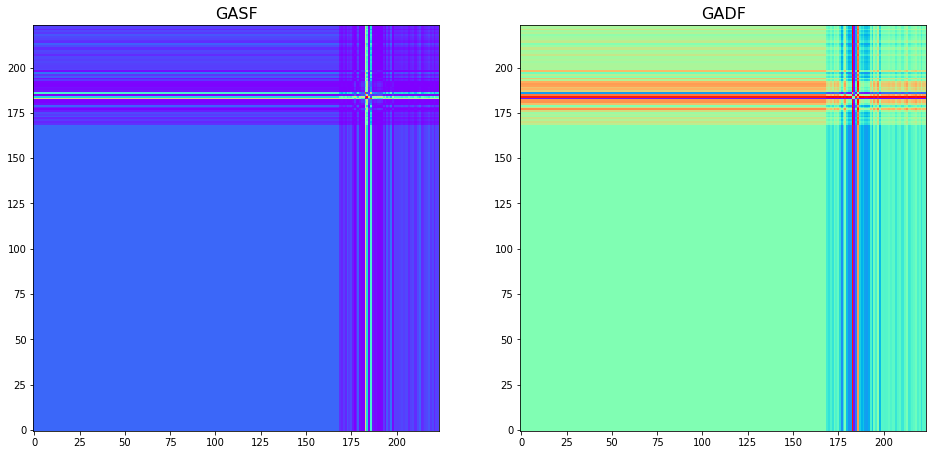

In [89]:
plot_transformed_images(*transform_sample(tr_X[3], *get_gasf_gadf_models(tr_X, image_size=224)))

In [53]:
gasf.transform()

(50, 50)